# Import essential libraries


In [55]:
# INecessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset for the project
from sklearn.datasets import load_breast_cancer

# Tools for splitting data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Machine learning models for classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

# Load breast cancer dataset & explore


In [2]:
cancer_dataset = load_breast_cancer()
print(type(cancer_dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
print(len(cancer_dataset["feature_names"]))
print(cancer_dataset["feature_names"])

30
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print(cancer_dataset["data"])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
print(cancer_dataset["target_names"])

['malignant' 'benign']


In [6]:
# 0 - malignant
# 1 - benign
print(cancer_dataset["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
# describe the dataset
print(cancer_dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [8]:
cancer_df = pd.DataFrame(
    np.c_[cancer_dataset["data"], cancer_dataset["target"]],
    columns=np.append(cancer_dataset["feature_names"], ["target"]),
)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Data Visualization


## Pair plots


In [11]:
# sns.pairplot(cancer_df, hue="target")

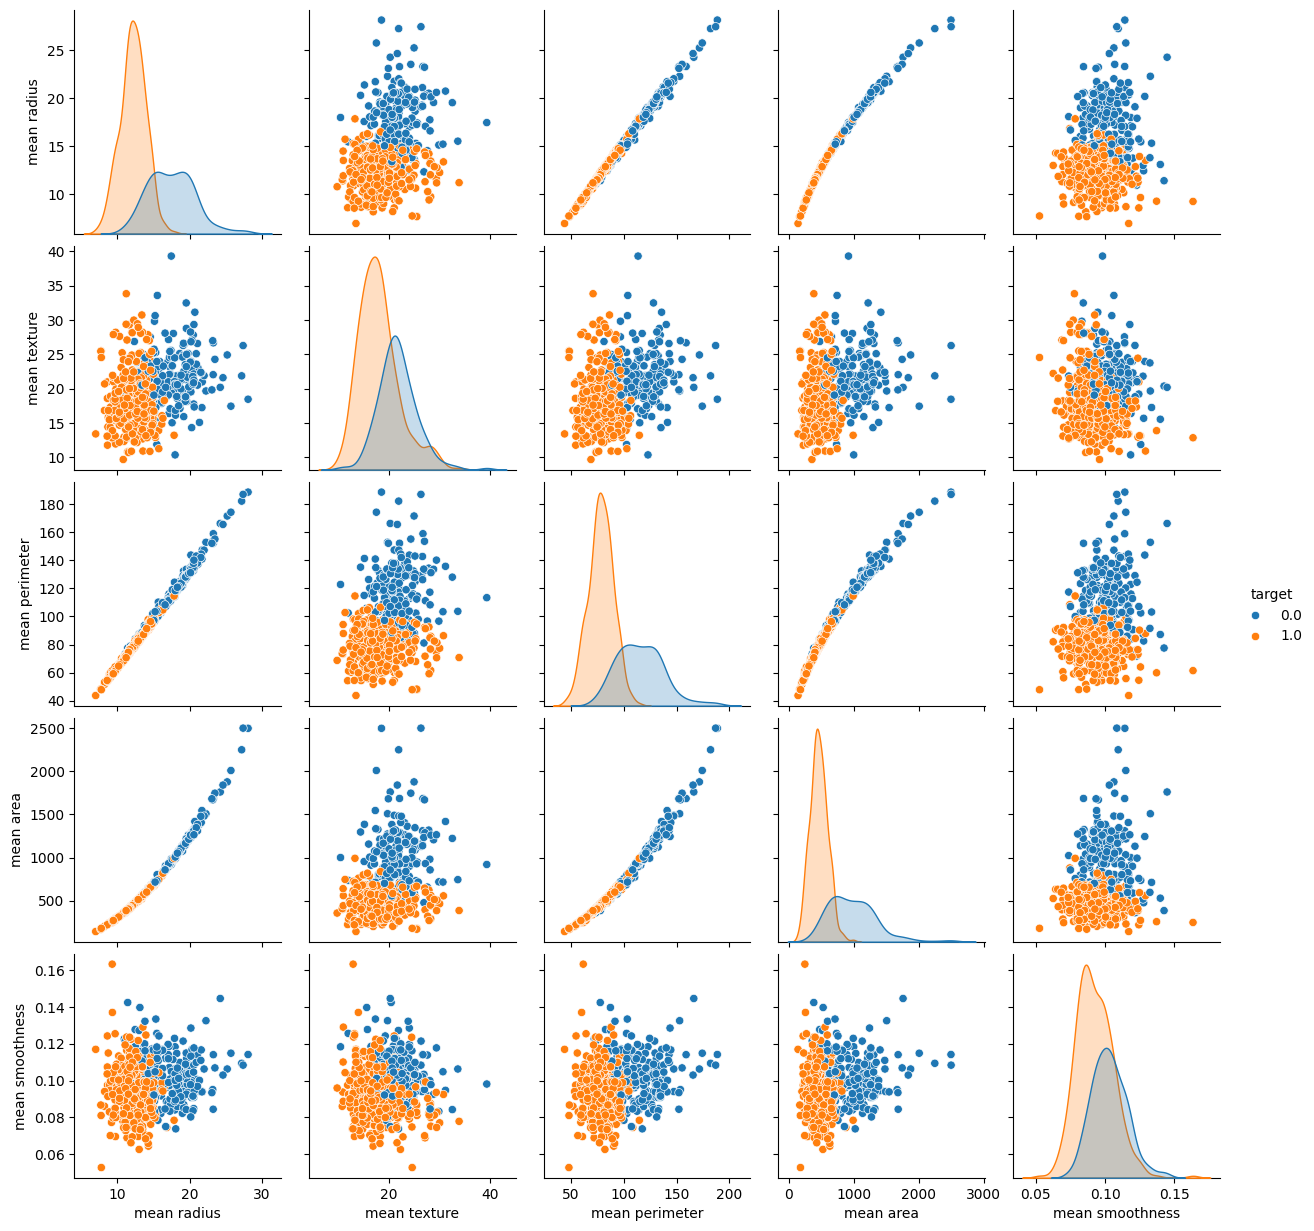

In [12]:
sns.pairplot(
    cancer_df,
    hue="target",
    vars=[
        "mean radius",
        "mean texture",
        "mean perimeter",
        "mean area",
        "mean smoothness",
    ],
)

## Counterplot


total count of malignent and benign tumor patients in countplot


<Axes: xlabel='target', ylabel='count'>

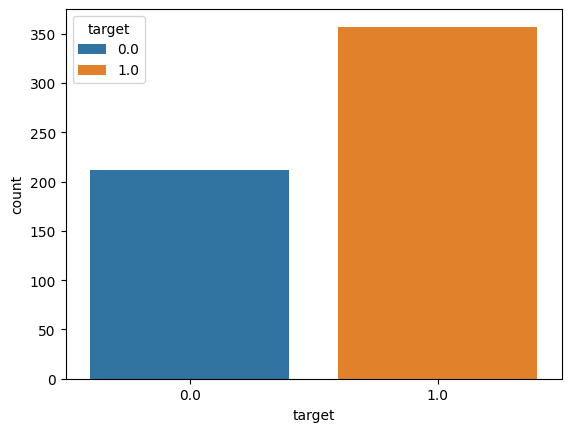

In [13]:
sns.countplot(data=cancer_df, x="target", hue="target")

C:\Users\Makara\AppData\Local\Temp\ipykernel_7648\1340022044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cancer_df, x="mean radius", palette=palette)
C:\Users\Makara\AppData\Local\Temp\ipykernel_7648\1340022044.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)


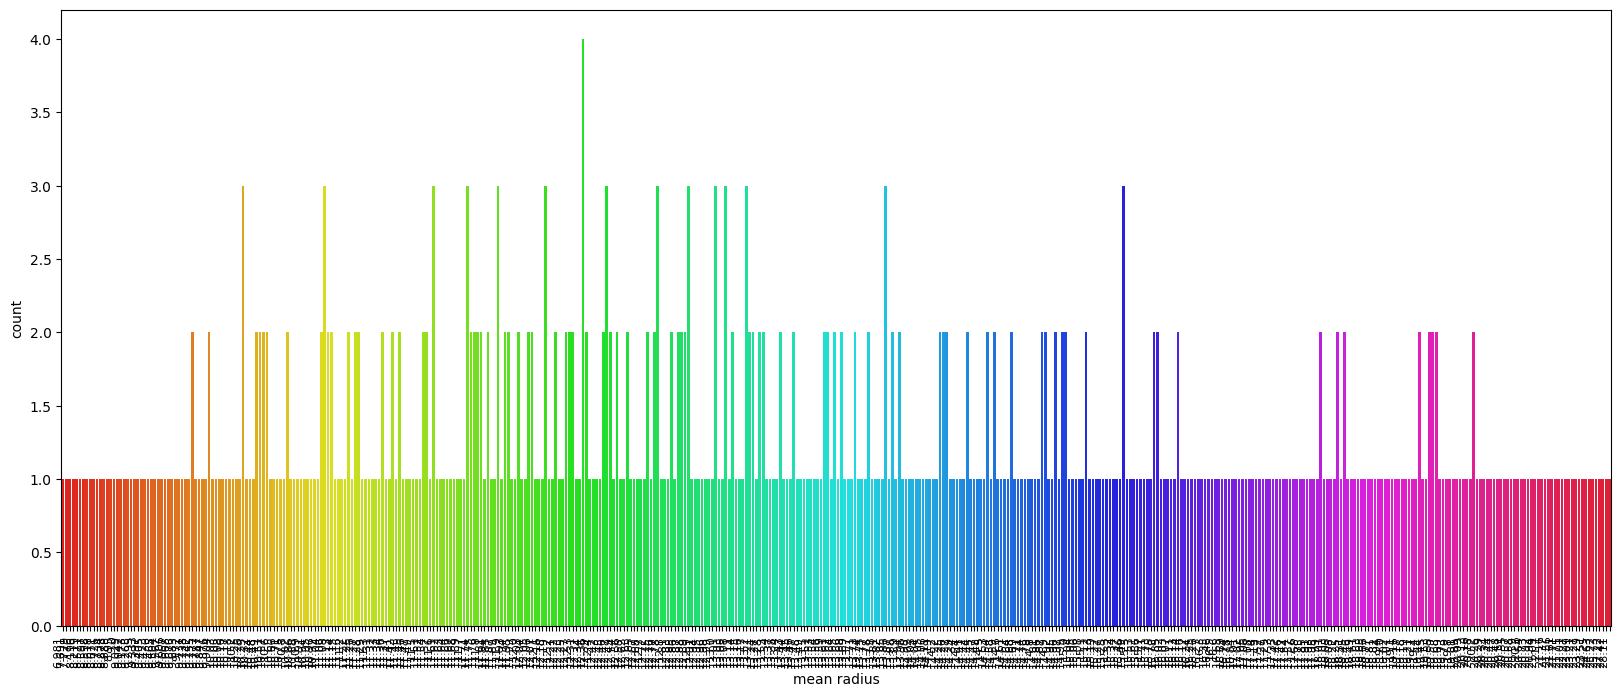

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cancer_df is your DataFrame
# Generating a color palette based on the unique values in the 'mean radius' column
unique_values = cancer_df["mean radius"].nunique()
palette = sns.color_palette("hsv", unique_values)

# Plotting the countplot with rotated x-axis labels
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=cancer_df, x="mean radius", palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)
plt.show()

## Heatmap


Heatmap for full dataset


<Axes: >

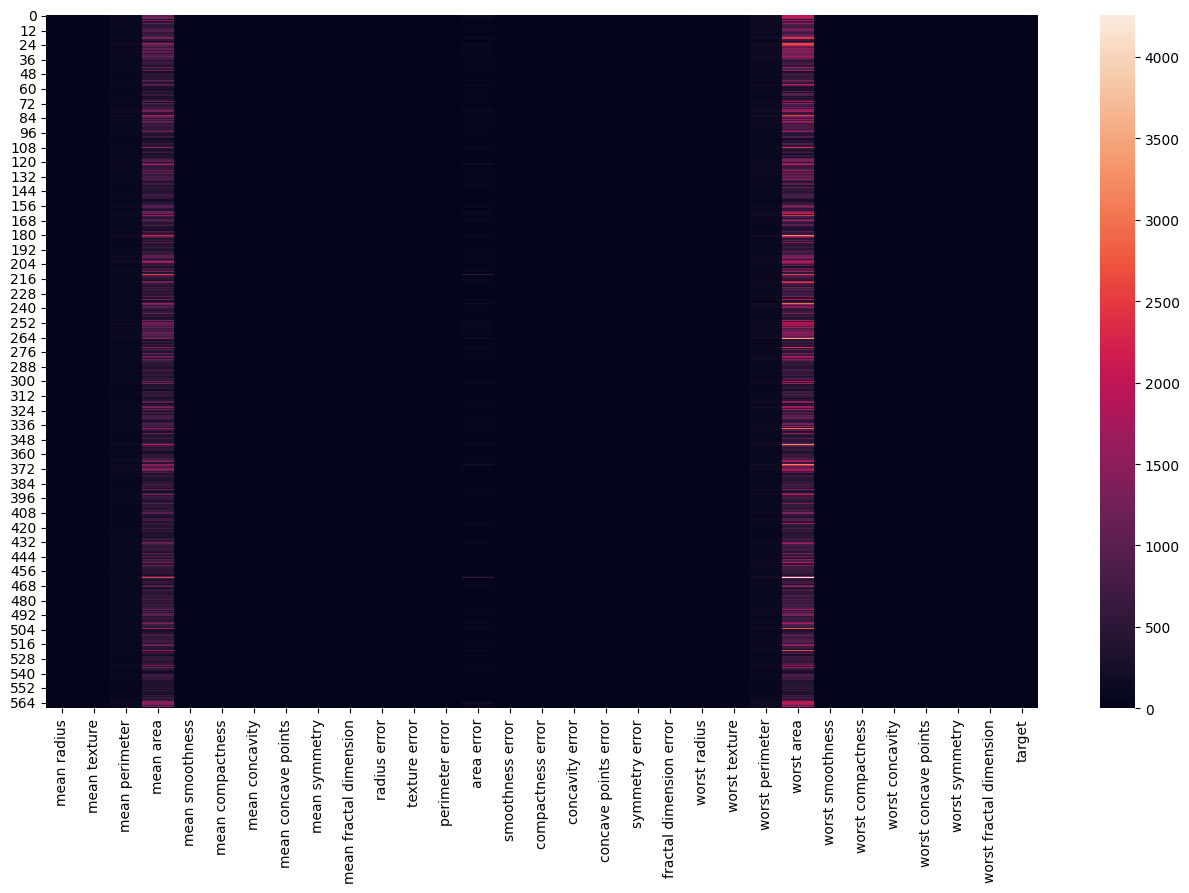

In [15]:
plt.figure(figsize=(16, 9))
sns.heatmap(cancer_df)

Heatmap of a correlation matrix


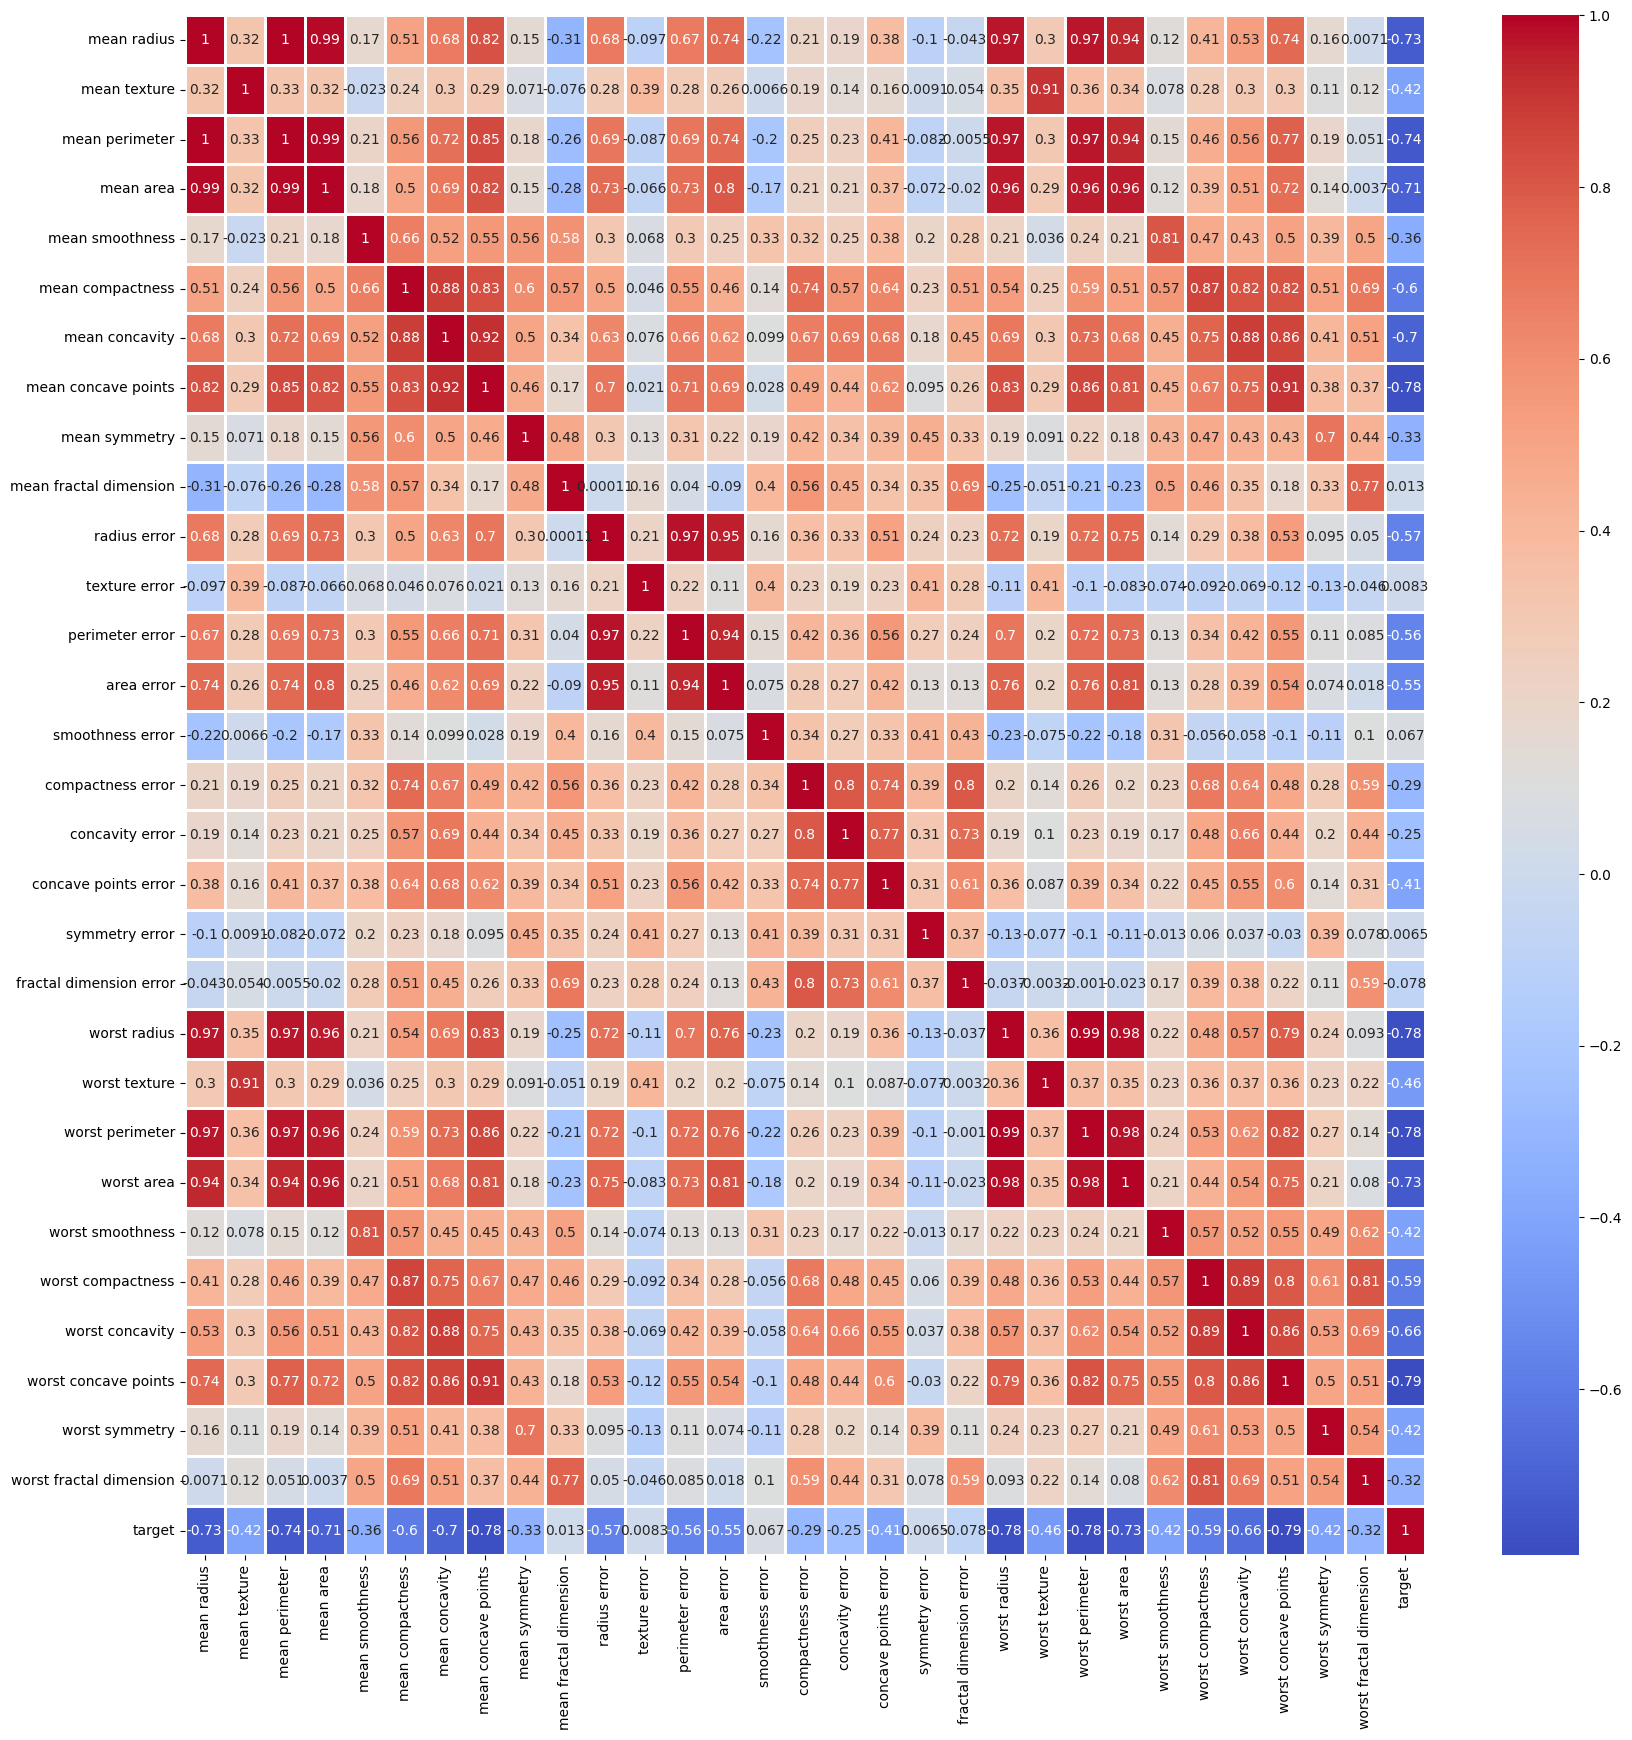

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(cancer_df.corr(), annot=True, cmap="coolwarm", linewidths=2)
plt.show()

## Correlation barplot


In [17]:
cancer_df2 = cancer_df.drop(["target"], axis=1)
print("The shape of 'cancer_df2' is: ", cancer_df2.shape)

The shape of 'cancer_df2' is:  (569, 30)


C:\Users\Makara\AppData\Local\Temp\ipykernel_7648\3673946921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


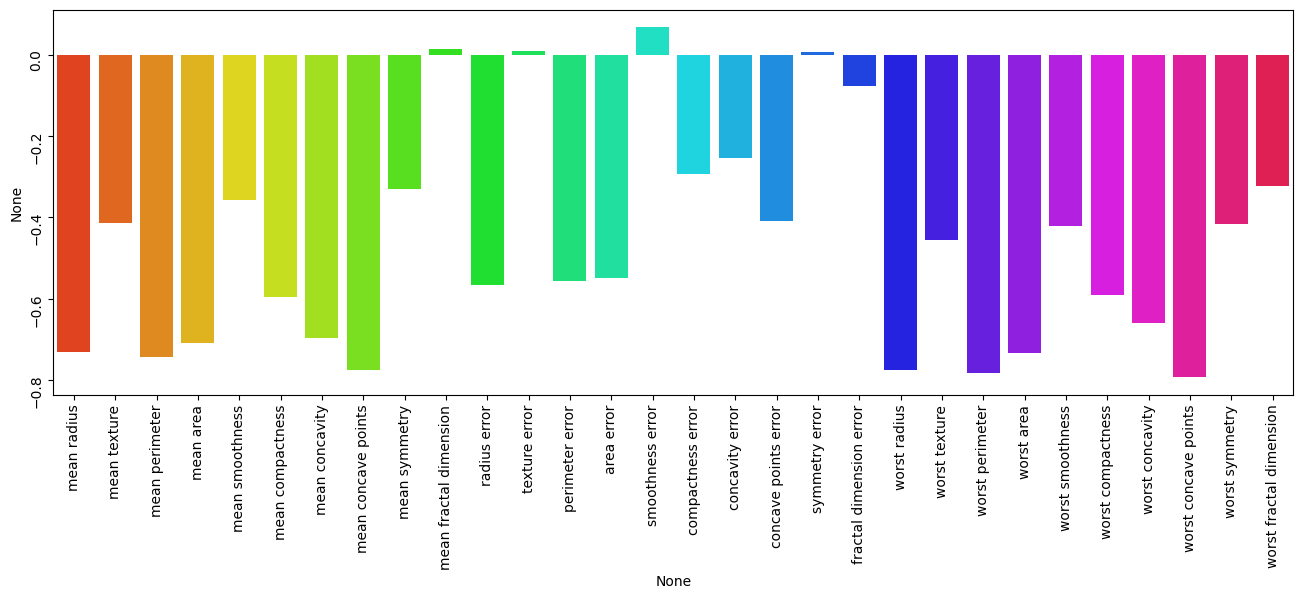

In [18]:
plt.figure(figsize=(16, 5))
ax = sns.barplot(
    x=cancer_df2.corrwith(cancer_df.target).index,
    y=cancer_df2.corrwith(cancer_df.target),
    palette=sns.color_palette(
        "hsv", len(cancer_df2.columns)
    ),  # Using a color palette with as many colors as columns
)
ax.tick_params(labelrotation=90)
plt.show()

# Data Preprocessing


## Splitting the dataset into the Training set and Test set


In [19]:
X = cancer_df.drop(["target"], axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
y = cancer_df["target"]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [22]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


## Feature Scaling

`Converting different units and magnitude data in one unit.`


In [23]:
sc = StandardScaler()

In [24]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [25]:
X_train_sc

array([[-0.25014735, -0.76796585, -0.31169473, ..., -1.36032957,
        -0.38766321,  0.02350022],
       [-0.7831845 , -0.35579205, -0.79945921, ..., -0.38997167,
         0.16066118, -0.33873063],
       [ 1.16355985,  0.64991203,  1.09220769, ..., -0.31435327,
        -0.86787277, -1.01055568],
       ...,
       [ 1.11431186,  0.45677916,  1.38705669, ...,  1.32310611,
         0.62384203,  2.05821888],
       [ 0.49726342,  0.90192687,  0.59938866, ...,  1.432698  ,
         0.67322529,  2.36385116],
       [-1.21309054, -0.42645042, -1.2025599 , ..., -0.87687278,
         0.18790711, -0.54531542]])

In [26]:
X_test_sc

array([[ 0.35821026,  1.45777268,  0.46038842, ...,  1.41704202,
         1.95548699,  0.86738493],
       [-0.49928428,  0.73941263, -0.48944655, ..., -0.46887783,
        -1.03986272,  0.41799227],
       [ 0.12645498, -1.92911834,  0.11836359, ...,  0.15986649,
         0.01762003, -0.19100836],
       ...,
       [ 1.2301895 , -0.11790888,  1.14275323, ...,  0.70782593,
         0.55743007, -0.79548111],
       [-0.76580285,  0.30604131, -0.58506187, ...,  2.27968674,
         6.40168261,  5.06926289],
       [ 0.95208316,  0.93725605,  0.82263147, ..., -0.46245888,
        -0.7265345 , -1.03489307]])

# Model Building


- The output is a categorical format so we will use supervised classification machine learning algorithms.
- To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.


## 1. Support Vector Classifier


In [27]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
y_pred_svc

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [28]:
accuracy_score(y_test, y_pred_svc)

0.9385964912280702

`Train with Standard scaler data`


In [29]:
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)

In [30]:
accuracy_score(y_test, y_pred_svc_sc)

0.9649122807017544

## 2. Logistic Regression


In [31]:
lr_classifier = LogisticRegression(random_state=51, penalty="l1", solver="liblinear")
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
y_pred_lr

C:\Users\Makara\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

In [32]:
accuracy_score(y_test, y_pred_lr)

0.9649122807017544

`Train with Standard scaler data`


In [33]:
lr_classifier2 = LogisticRegression(random_state=51, penalty="l1", solver="liblinear")
lr_classifier2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier.predict(X_test_sc)
y_pred_lr_sc

C:\Users\Makara\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.])

In [34]:
accuracy_score(y_test, y_pred_lr_sc)

0.6052631578947368

## 3. K - Nearest Neighbor Classifier


In [35]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)
y_pred_knn

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [36]:
accuracy_score(y_test, y_pred_knn)

0.9385964912280702

`Train with Standard scaler data`


In [37]:
knn_classifier2 = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_classifier2.fit(X_train_sc, y_train)

y_pred_knn_sc = knn_classifier2.predict(X_test_sc)
y_pred_knn_sc

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [38]:
accuracy_score(y_test, y_pred_knn_sc)

0.9649122807017544

## 4. Naive Bayes Classifier


In [39]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)
y_pred_nb

array([0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [40]:
accuracy_score(y_test, y_pred_nb)

0.9473684210526315

`Train with standard scaled data`


In [42]:
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)

y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
y_pred_nb_sc

array([0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [43]:
accuracy_score(y_test, y_pred_nb_sc)

0.9385964912280702

## 5. Decision Tree Classifier


In [45]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=51)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
y_pred_dt

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])

`Train with standard scaled data`

In [47]:
dt_classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=51)
dt_classifier2.fit(X_train, y_train)

y_pred_dt_sc = dt_classifier2.predict(X_test_sc)
y_pred_dt_sc

C:\Users\Makara\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

In [48]:
accuracy_score(y_test, y_pred_dt_sc)

0.7543859649122807

## 6. Random Forest Classifier

In [52]:
rf_classifier = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=51)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

`Train with standard scaled data`

In [53]:
rf_classifier2 = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=51)
rf_classifier2.fit(X_train_sc, y_train)

y_pred_rf_sc = rf_classifier2.predict(X_test_sc)
y_pred_rf_sc

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [54]:
accuracy_score(y_test, y_pred_rf_sc)

0.9736842105263158

## 7. XGBoost Classifier

In [56]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_xgb

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0])

In [57]:
accuracy_score(y_test, y_pred_xgb)

0.9824561403508771

`Train with standard scaled data`

In [58]:
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_sc, y_train)

y_pred_xgb_sc = xgb_classifier2.predict(X_test_sc)
y_pred_xgb_sc

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0])

In [59]:
accuracy_score(y_test, y_pred_xgb_sc)

0.9824561403508771